# Logistic Regression Assignment - Theoretical

1.	What is Logistic Regression, and how does it differ from Linear Regression?
  - Logistic Regression predicts probabilities for classification (binary or multiclass), whereas Linear Regression predicts continuous values. Logistic uses a sigmoid or softmax function; Linear does not.
2.	What is the mathematical equation of Logistic Regression?
  - P(Y=1∣X)=11+e−(β0+β1X1+⋯+βnXn)P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \cdots + \beta_nX_n)}}P(Y=1∣X)=1+e−(β0+β1X1+⋯+βnXn)1
3.	Why do we use the Sigmoid function in Logistic Regression?
  - The sigmoid function maps any real-valued number to a range between 0 and 1, making it ideal for probability outputs.
4.	What is the cost function of Logistic Regression?
  - The Log Loss (Binary Cross Entropy):
−1n∑[yilog⁡(pi)+(1−yi)log⁡(1−pi)]-\frac{1}{n} \sum \left[y_i \log(p_i) + (1 - y_i)\log(1 - p_i)\right]−n1∑[yilog(pi)+(1−yi)log(1−pi)]
5.	What is Regularization in Logistic Regression? Why is it needed?
  -Regularization penalizes large coefficients to prevent overfitting. It's needed to improve model generalization.
6.	Difference between Lasso, Ridge, and Elastic Net Regression:
  - o	Lasso (L1): Can shrink some coefficients to 0 (feature selection)
  - o	Ridge (L2): Shrinks coefficients uniformly (keeps all features)
  - o	Elastic Net: Combines L1 and L2 for both regularization and selection
7.	When to use Elastic Net?
  - Use when there is multicollinearity and you want both feature selection and regularization.
8.	Impact of regularization parameter (λ or C):
  - o	Larger λ (or smaller C in sklearn) → more regularization
  - o	Controls overfitting vs. underfitting
9.	Key assumptions of Logistic Regression:
  - o	Linearity of independent variables with log-odds
  - o	Independence of observations
  - o	No multicollinearity
  - o	Large sample size
10.	Alternatives to Logistic Regression:
  - o	Decision Trees
    o	Random Forest
    o	SVM
    o	KNN
    o	Naive Bayes
    o	Neural Networks
11.	Classification Evaluation Metrics:
    o	Accuracy
    o	Precision
    o	Recall
    o	F1-Score
    o	ROC-AUC
    o	Confusion Matrix
    o	Cohen's Kappa
    o	MCC
12.	How does class imbalance affect Logistic Regression?
  - It biases predictions toward the majority class. Use class weights, sampling, or threshold tuning.
13.	What is Hyperparameter Tuning?
  - Finding the optimal values for parameters like C, penalty, and solver using methods like GridSearchCV or RandomizedSearchCV.
14.	Different solvers & when to use them:
    o	liblinear: good for small data, supports L1
    o	saga: supports L1, L2, Elastic Net, good for large data
    o	lbfgs: fast and stable, for L2
    o	newton-cg: like lbfgs, but supports multiclass
15.	How is Logistic Regression extended to multiclass?
    o	One-vs-Rest (OvR): One classifier per class
    o	Multinomial (Softmax): A single model for all classes
16.	Advantages & Disadvantages:
    o	 Simple, interpretable, probabilistic
    o	 Assumes linearity, limited with complex patterns
17.	Use cases:
    o	Spam detection
    o	Disease prediction
    o	Credit scoring
    o	Customer churn prediction
18.	Difference: Softmax vs. Logistic Regression:
    o	Logistic (binary): outputs probability for 2 classes
    o	Softmax (multiclass): outputs probabilities for all classes summing to 1
19.	OvR vs. Softmax:
    o	OvR is simple, flexible, and works well with imbalance
    o	Softmax models all classes together, better for balanced data
20.	Interpretation of coefficients:
  - Coefficients represent the change in log odds for a unit change in the predictor.


# Logistic Regression Assignment -Practical(Python Code)



In [1]:
# 1. Load dataset, split, apply Logistic Regression, print accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
# 2. L1 Regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
print("L1 Accuracy:", model_l1.score(X_test, y_test))

L1 Accuracy: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [3]:
# 3. L2 Regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
model_l2.fit(X_train, y_train)
print("L2 Accuracy:", model_l2.score(X_test, y_test))
print("Coefficients:", model_l2.coef_)

L2 Accuracy: 0.956140350877193
Coefficients: [[ 2.13248406e+00  1.52771940e-01 -1.45091255e-01 -8.28669349e-04
  -1.42636015e-01 -4.15568847e-01 -6.51940282e-01 -3.44456106e-01
  -2.07613380e-01 -2.97739324e-02 -5.00338038e-02  1.44298427e+00
  -3.03857384e-01 -7.25692126e-02 -1.61591524e-02 -1.90655332e-03
  -4.48855442e-02 -3.77188737e-02 -4.17516190e-02  5.61347410e-03
   1.23214996e+00 -4.04581097e-01 -3.62091502e-02 -2.70867580e-02
  -2.62630530e-01 -1.20898539e+00 -1.61796947e+00 -6.15250835e-01
  -7.42763610e-01 -1.16960181e-01]]


In [4]:
# 4. Elastic Net Regularization
model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model_elastic.fit(X_train, y_train)
print("Elastic Net Accuracy:", model_elastic.score(X_test, y_test))

Elastic Net Accuracy: 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
# 5. Multiclass Logistic Regression with OvR
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ovr.fit(X_train, y_train)
print("OvR Accuracy:", model_ovr.score(X_test, y_test))

OvR Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter grid
model = LogisticRegression(max_iter=200)
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Perform GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid.best_params_}")
print(f"Accuracy: {accuracy:.4f}")

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 1.0000


In [8]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize model and StratifiedKFold
model = LogisticRegression(max_iter=200)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

# Perform cross-validation
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print(f"Average Accuracy: {np.mean(accuracies):.4f}")

Average Accuracy: 0.9667


In [9]:
# 8.Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset (assuming Iris saved as CSV)
# For demo, load Iris and save as CSV
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.to_csv('iris.csv', index=False)

# Read CSV
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [10]:
# 9.Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter distribution
model = LogisticRegression(max_iter=200)
param_dist = {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Predict and evaluate
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': np.float64(0.30584494295802445), 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [11]:
#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train OvO model
model = OneVsOneClassifier(LogisticRegression(max_iter=200))
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with OvO: {accuracy:.4f}")

Accuracy with OvO: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


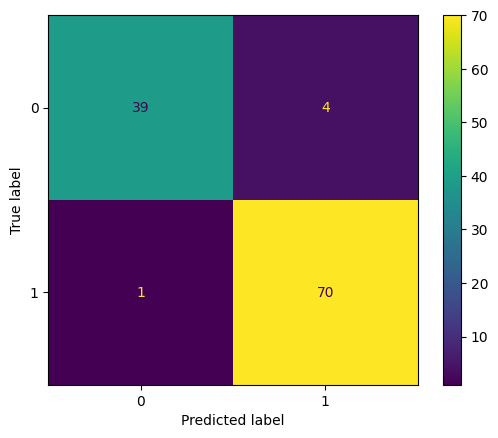

In [12]:
# 11.Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load binary dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and plot confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [13]:
# 12.Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,Recall, and F1-Score.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9459
Recall: 0.9859
F1-Score: 0.9655


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with class weights
model = LogisticRegression(class_weight='balanced', max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Class Weights: {accuracy:.4f}")

Accuracy with Class Weights: 0.9737


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# 14.Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset (assuming it's downloaded)
# For demo, use a simplified approach
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocess: Handle missing values, encode categorical variables
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Titanic Accuracy: {accuracy:.4f}")

Titanic Accuracy: 0.7483


In [16]:
# 15.  Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_no_scale = accuracy_score(y_test, y_pred)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {acc_no_scale:.4f}")
print(f"Accuracy with scaling: {acc_scaled:.4f}")

Accuracy without scaling: 1.0000
Accuracy with scaling: 1.0000


In [17]:
# 16.Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict probabilities and evaluate ROC-AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9977


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# 17.Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with C=0.5
model = LogisticRegression(C=0.5, max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with C=0.5: {accuracy:.4f}")

Accuracy with C=0.5: 1.0000


In [19]:
# 18.Write a Python program to train Logistic Regression and identify important features based on model coefficients.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Coefficient': model.coef_[0]  # For one class
})
print("Feature Importance:")
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))

Feature Importance:
             Feature  Coefficient
2  petal length (cm)    -2.375124
3   petal width (cm)    -0.998746
1   sepal width (cm)     0.962518
0  sepal length (cm)    -0.393456


In [20]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate Cohen's Kappa
y_pred = model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

Cohen's Kappa Score: 0.9053


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


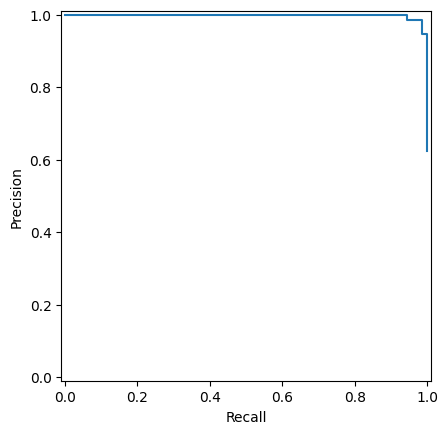

In [21]:
# 20.Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict probabilities and plot Precision-Recall curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [22]:
# 21.Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different solvers
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {solver}: {accuracy:.4f}")

Accuracy with liblinear: 1.0000
Accuracy with saga: 1.0000
Accuracy with lbfgs: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
# 22.Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate MCC
y_pred = model.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

Matthews Correlation Coefficient: 0.9068


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Raw data
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred)

# Standardized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy on raw data: {acc_raw:.4f}")
print(f"Accuracy on standardized data: {acc_scaled:.4f}")


Accuracy on raw data: 1.0000
Accuracy on standardized data: 1.0000


In [25]:
# 24.Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter grid for C
model = LogisticRegression(max_iter=200)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimal C: {grid.best_params_['C']}")
print(f"Accuracy: {accuracy:.4f}")

Optimal C: 1
Accuracy: 1.0000


In [26]:
# 25.Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'logistic_model.pkl')

# Load model and predict
loaded_model = joblib.load('logistic_model.pkl')
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with loaded model: {accuracy:.4f}")

Accuracy with loaded model: 1.0000
